Using the open source models  from black labs used as a base model in Grok Ai by Elon Musk try it just by creating token for free on hugging face visi here https://huggingface.co/black-forest-labs/FLUX.1-dev

In [1]:
import requests
import io
from PIL import Image

# Define the API URL and the authorization header
API_URL = "https://api-inference.huggingface.co/models/black-forest-labs/FLUX.1-schnell"
headers = {"Authorization": "Bearer hf_************************"}  # Replace with your actual token

# Function to query the API
def query(payload):
    response = requests.post(API_URL, headers=headers, json=payload)
    return response

# Query the API with the input
response = query({"inputs": "game of thrones iron throne in the  white house ovar officer with the usa flag in it "})

# Check if the response is successful
if response.status_code == 200:
    # Verify content type is an image
    content_type = response.headers['Content-Type']
    if 'image' in content_type:
        # Load the image
        image_bytes = response.content
        image = Image.open(io.BytesIO(image_bytes))

        # Save the image to a file
        image.save("output_image.png")
        print("Image saved as 'output_image.png'")

        # Optionally display the image
        image.show()
    else:
        print(f"Unexpected Content-Type: {content_type}")
else:
    # Print the error status and message
    print(f"Error: {response.status_code}")
    print(response.json())  # Assuming the error response is in JSON format


Image saved as 'output_image.png'


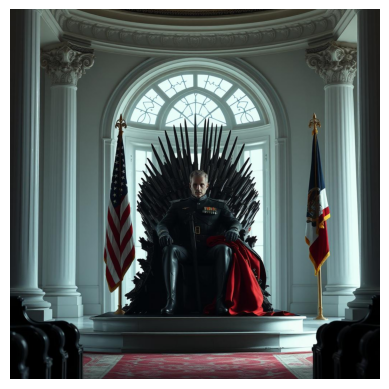

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
img = Image.open('/content/output_image.png')

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()